In [1]:
from Regression import Regression
from Franke import FrankeCentered, FrankeCenteredNoise

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Lasso
from sklearn.utils import resample
import scipy.stats
import time
from imageio import imread
from tqdm import tqdm, trange

mpl.style.use("seaborn-darkgrid")
mpl.rcParams["image.cmap"] = "gnuplot2"
mpl.rcParams['figure.figsize'] = [6.0, 6.0]

np.random.seed(1942)

NameError: name 'profile' is not defined

In [2]:
def bias_variance(solver, poly_orders, nr_bootstraps=100, lamda=1e-4):

    error_list = np.zeros(len(poly_orders))
    bias_list = np.zeros(len(poly_orders))
    var_list = np.zeros(len(poly_orders))

    x_train, x_test, y_train, y_test, output_train, output_test = train_test_split(reg.x_flat, reg.y_flat, reg.f_flat, test_size = 0.25)

    for j in trange(len(poly_orders)):
        poly_order = poly_orders[j]
        X_test = reg.get_X(x_test, y_test, poly_order=poly_order)
        output_pred = np.zeros((nr_bootstraps, output_test.shape[0]))
        for i in range(nr_bootstraps):
            x_, y_, output_ = resample(x_train, y_train, output_train)
            X_ = reg.get_X(x_, y_, poly_order=poly_order)
            if solver == "OLS" or solver == "OLS_unsafe" or solver == "Ridge":
                beta = reg.get_beta(X_, output_, solver=solver, lamda=lamda)
            elif solver == "Lasso":
                _Lasso = Lasso(alpha=lamda, fit_intercept=False)
                clf = _Lasso.fit(X_, output_)
                beta = clf.coef_
            output_pred[i] = X_test@beta

        error = np.mean( np.mean((output_test - output_pred)**2, axis=0, keepdims=True) )
        bias = np.mean( (output_test - np.mean(output_pred, axis=0, keepdims=True))**2 )
        var = np.mean( np.var(output_pred, axis=0, keepdims=True) )

        error_list[j] += error
        bias_list[j] += bias
        var_list[j] += var
    
    return error_list, bias_list, var_list

In [3]:
#x, y = np.linspace(-0.5, 0.5, 101), np.linspace(-0.5, 0.5, 101)
#reg = Regression()
#reg.generate_generic_data(x, y, FrankeCenteredNoise)

terrain1 = imread("../input_data/SRTM_data_Norway_1.tif")[::16, ::16]
reg = Regression()
reg.load_matrix_data(terrain1); terrain1.shape

(226, 113)

In [ ]:
plt.figure(figsize=(16,8))
plt.imshow(terrain1)

In [ ]:
poly_orders_Lasso = np.arange(10, 12, 2)

error_list_Lasso, bias_list_Lasso, var_list_Lasso = bias_variance("Lasso", poly_orders_Lasso, lamda=1e-3)

In [ ]:
poly_orders = np.arange(0, 10, 2)

error_list_Ridge, bias_list_Ridge, var_list_Ridge = bias_variance("Ridge", poly_orders, lamda=1e-4)

In [ ]:
poly_orders = np.arange(0, 10, 2)

error_list_OLS, bias_list_OLS, var_list_OLS = bias_variance("OLS", poly_orders)

In [ ]:
plt.plot(poly_orders, error_list_OLS)
plt.plot(poly_orders, error_list_Ridge)
plt.plot(poly_orders_Lasso, error_list_Lasso)

In [ ]:
plt.plot(poly_orders, bias_list_OLS)
plt.plot(poly_orders, bias_list_Ridge)
plt.plot(poly_orders_Lasso, bias_list_Lasso)

In [ ]:
plt.plot(poly_orders, var_list_OLS)
plt.plot(poly_orders, var_list_Ridge)
plt.plot(poly_orders_Lasso, var_list_Lasso)

# Only Error (no bootstrap)

In [18]:
err_list_OLS = []

poly_orders = 2**np.linspace(2, 6.5, 6)

for i in range(len(poly_orders)):
    poly_order = int(poly_orders[i])
    print(poly_order)
    data_pred_OLS = reg.solveKFold(poly_order=poly_order, K=5, solver="OLS")
    err_list_OLS.append(MSE(reg.f, data_pred_OLS))

4
7
13
25
48
90


In [19]:
err_list_Ridge = []

for i in range(len(poly_orders)):
    poly_order = int(poly_orders[i])
    print(poly_order)
    data_pred_Ridge = reg.solveKFold(poly_order=poly_order, K=5, solver="Ridge", lamda=1e-6)
    err_list_Ridge.append(MSE(reg.f, data_pred_Ridge))

4
7
13
25
48
90


In [20]:
err_list_Ridge10 = []

for i in range(len(poly_orders)):
    poly_order = int(poly_orders[i])
    print(poly_order)
    data_pred_Ridge = reg.solveKFold(poly_order=poly_order, K=5, solver="Ridge", lamda=1e-8)
    err_list_Ridge10.append(MSE(reg.f, data_pred_Ridge))

4
7
13
25
48
90


In [15]:
err_list_Lasso = []

poly_orders_Lasso = 2**np.arange(2, 5, 1)

for i in range(len(poly_orders_Lasso)):
    poly_order = int(poly_orders_Lasso[i])
    print(poly_order)
    data_pred_Lasso = reg.solveKFold(poly_order=poly_order, K=5, solver="Lasso", lamda=1e-4, tol=1e-3, max_iter=1e8)
    err_list_Lasso.append(MSE(reg.f, data_pred_Lasso))

4
6


KeyboardInterrupt: 

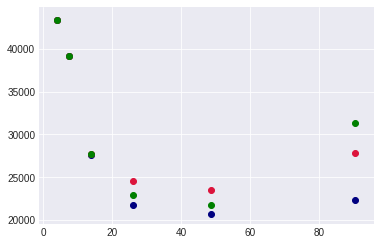

In [21]:
plt.scatter(poly_orders, err_list_OLS, color="navy", label="OLS")
plt.scatter(poly_orders, err_list_Ridge, color="crimson", label="Ridge")
plt.scatter(poly_orders, err_list_Ridge10, color="green")
#plt.scatter(poly_orders_Lasso, err_list_Lasso)

In [1]:
plt.imshow(data_pred_Ridge)

NameError: name 'plt' is not defined

In [ ]:
plt.imshow(data_pred_OLS)

In [ ]:
plt.imshow(data_pred_Lasso)